## Advance Machine Learning HW 3

In [3]:
## Import Libraries
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from itertools import *
from more_itertools import *
from functools import *
from collections import *
import torch.nn.functional as F
from sympy import *

### Initiate Data

In [4]:
training_data = datasets.QMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.QMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

57.7%

100.0%


Extracting data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to data/QMNIST/raw


100.0%

Extracting data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to data/QMNIST/raw



59.2%

100.0%


Extracting data/QMNIST/raw/qmnist-test-images-idx3-ubyte.gz to data/QMNIST/raw


100.0%

Extracting data/QMNIST/raw/qmnist-test-labels-idx2-int.gz to data/QMNIST/raw


QMIST Data Structure


| Column                     | Description                  | Range              |
|----------------------------|------------------------------|--------------------|
| 0                          | Character class              | 0 to 9             |
| 1                          | NIST HSF series              | 0, 1, or 4         |
| 2                          | NIST writer ID               | 0-610 and 2100-2599|
| 3                          | Digit index for this writer  | 0 to 149           |
| 4                          | NIST class code              | 30-39              |
| 5                          | Global NIST digit index      | 0 to 281769        |
| 6                          | Duplicate                    | 0                  |
| 7                          | Unused                       | 0                  |


In [18]:
print("Training Data: ", len(training_data))
print("Test Data: ", len(test_data))  
print("Shape of training data: ", training_data.data.shape)
print("Shape of labels for training data: ", training_data.targets.shape) ## These are listed above

Training Data:  60000
Test Data:  60000
Shape of training data:  torch.Size([60000, 28, 28])
Shape of test data:  torch.Size([60000, 28, 28])
Shape of labels for training data:  torch.Size([60000, 8])


In [22]:
# Extract data for the high school students.
HSidx = [idx for idx, target in enumerate(training_data.targets) if target[1] == 4]
print("Number of images by HS students: ", len(HSidx))

Number of images by HS students:  29050


In [44]:
## Get the data for the high school students.
train_images = training_data.data[HSidx]
train_labels = training_data.targets[HSidx]
print("Shape of training images for HS students: ", train_images.shape)
print("Shape of training labels for HS students: ", train_labels.shape)

Shape of training images for HS students:  torch.Size([29050, 28, 28])
Shape of training labels for HS students:  torch.Size([29050, 8])


In [45]:
## Create a list of labels and writer idx for the data. We will only use there as out label everythin else is useless to us.
digit_label = train_labels[:,0]
writer_idx = train_labels[:,2]
print("Shape of digit labels: ", digit_label.shape)
print("Shape of writer idx: ", writer_idx.shape)

Shape of digit labels:  torch.Size([29050])
Shape of writer idx:  torch.Size([29050])


In [50]:
## Now we hot encode the labels.
unique_labels = torch.unique(digit_label)
unique_writers = torch.unique(writer_idx)

num_unique_labels = len(unique_labels)
num_unique_writers = len(unique_writers)
print("Number of unique labels: ", num_unique_labels)
print("Number of unique writers: ", num_unique_writers)

## Labels are already uniquily mapped we need to map the writer idx to a unique number.
writer_idx_map = {writer.item(): idx for idx, writer in enumerate(unique_writers)}

## Now we map the writer idx to the unique number.
writer_idx_mapped = torch.tensor([writer_idx_map[writer.item()] for writer in writer_idx])

## One Hot Encode the labels.
one_hot_digits = F.one_hot(digit_label, num_classes=num_unique_labels)
one_hot_writer = F.one_hot(writer_idx_mapped, num_classes=num_unique_writers)
print("Shape of one hot encoded labels: ", one_hot_digits.shape)
print("Shape of one hot encoded writer idx: ", one_hot_writer.shape)
print("Five one hot encoded labels: ", one_hot_digits[:5])
print("Five one hot encoded writer idx: ", one_hot_writer[:5])

Number of unique labels:  10
Number of unique writers:  250
Shape of one hot encoded labels:  torch.Size([29050, 10])
Shape of one hot encoded writer idx:  torch.Size([29050, 250])
Five one hot encoded labels:  tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]])
Five one hot encoded writer idx:  tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [ ]:
def lookup_table(f: dict, x: list):
  y = [f[k] for k in x]
  return y

# create new data id for subset
dat_idx = list(range(Nsamples))
# print("Dat IDX: ", len(dat_idx), dat_idx)

# we will look at digits by class AND writer (id of student who wrote the digit)
tl = train_targets[:,0].tolist() # digit label
tw = train_targets[:,2].tolist() # digit author index

print("TL: ", len(tl),  tl)
print("TW: ", tw)

# which writer ids are in hfs 4?
writersidx = list(unique_everseen(tw)) # find unique writer list
print("Writers IDX: ", len(writersidx), writersidx)
# how many?  250
Nwriters=len(writersidx)

# Make indicator Vector representations of indices.  This allows better match between math and computation
# convert label indices into set of one hot vectors.  H for "Hot".  These are glorified identity matrices!
Hlabel = F.one_hot(torch.arange(0, 10) % 10, num_classes=10)
Hwriter = F.one_hot(torch.arange(0, Nwriters) % (Nwriters), num_classes=Nwriters)

# convert the unique writer id into an hfs local version.  Makes indexing im tensor easier
w_idx = list(range(Nwriters))
print("W IDX: ", len(w_idx), w_idx)
# put in correspondence with original ids
w_dict = dict(zip(writersidx,w_idx))
print("W DICT: ", len(w_dict), w_dict)

## Writer indices shifted to [0,249]
# create simple functional map between original and new indices
twi = lookup_table(w_dict,tw) # digit author list local to hfs 4
print("TWI: ", len(twi), twi)

# reshape images into column vectors
ims =(1/255)*train_ims.type(torch.float32).reshape([len(train_ims),28*28]).T


# Assign label one-hot indicator vectors to each sample.
Il = Hlabel[:,tl]
Iw = Hwriter[:,twi]

# check that the data is correct
print("IL[0]: ", len(Il), Il[0][5])
print("IW[0]: ", len(Iw), Iw[0])

# wrap data up as a tuple
data = (ims,Il,Iw)
print(data)

In [2]:
sample_ind = torch.arange(len(train_ims))
print("Sample_ind: ",len(sample_ind), sample_ind)

Sample_ind:  29050 tensor([    0,     1,     2,  ..., 29047, 29048, 29049])


In [3]:
from itertools import groupby
from collections import defaultdict

grouped_dict = defaultdict(dict)
# print("Grouped_dict", len(grouped_dict), grouped_dict)

# 2 = writer id, 0 = digit class, 3 = digit index for writer
wd = train_targets[:,[2,0]]
print("WD: ", len(wd), wd)

tuple_ind = list(map(tuple,wd.tolist()))
print("Tuple_ind: ", len(tuple_ind), tuple_ind)
wds = list(zip(tuple_ind,range(len(sample_ind))))
print("WDS: ", len(wds), wds)
data = sorted(wds, key=lambda x:x[0])
print("Data: ", len(data), data)

for key, subset in groupby(data,key=lambda x:x[0]):
  g = list(subset)
  ind = list(list(zip(*g))[1])
  grouped_dict[key[0]][key[1]] = torch.tensor(ind)

WD:  29050 tensor([[2154,    5],
        [2232,    4],
        [2168,    9],
        ...,
        [2145,    7],
        [2298,    9],
        [2143,    2]])
Tuple_ind:  29050 [(2154, 5), (2232, 4), (2168, 9), (2109, 1), (2124, 1), (2303, 3), (2276, 3), (2276, 1), (2152, 2), (2284, 6), (2127, 4), (2243, 9), (2114, 1), (2204, 4), (2176, 2), (2211, 3), (2285, 6), (2316, 0), (2187, 6), (2324, 7), (2278, 1), (2221, 7), (2322, 3), (2182, 8), (2114, 9), (2245, 3), (2158, 7), (2322, 9), (2183, 0), (2119, 4), (2203, 4), (2334, 6), (2287, 4), (2168, 6), (2309, 0), (2283, 1), (2339, 1), (2226, 3), (2312, 2), (2269, 1), (2304, 9), (2171, 2), (2147, 7), (2145, 3), (2109, 0), (2134, 6), (2239, 4), (2122, 8), (2328, 7), (2268, 3), (2153, 5), (2252, 1), (2348, 1), (2172, 6), (2260, 0), (2199, 9), (2335, 1), (2265, 0), (2106, 9), (2156, 0), (2194, 2), (2223, 2), (2330, 1), (2342, 6), (2280, 1), (2327, 3), (2317, 5), (2145, 1), (2292, 3), (2137, 5), (2167, 7), (2349, 4), (2232, 8), (2154, 8), (2307, 7),

In [4]:
grouped_dict.items()

# print("Grouped_dict: ", len(grouped_dict))

dict_items([(2100, {0: tensor([ 6002,  7560, 15904, 18042, 18367, 20206, 20716, 21050, 21431, 21594,
        23586, 25036, 25657]), 1: tensor([  390,   855,  5984,  6818, 11280, 13896, 18462, 23458, 23655, 25339,
        26087, 27276, 28908]), 2: tensor([  180,  1855,  2106, 10455, 11991, 13732, 14416, 15870, 18883, 19573,
        21140, 25849, 28983]), 3: tensor([  668,  2789,  4806, 10376, 17820, 18108, 20776, 21397, 24151, 25515,
        26701, 28252]), 4: tensor([  353,  1448,  2313,  3550,  4498,  7308,  9513, 11764, 12923, 15670,
        19651, 23626, 27758]), 5: tensor([   91,   256,  2038,  2311,  3921, 10133, 11956, 13801, 16710, 16801,
        19306, 21941, 22426]), 6: tensor([ 1048,  4073,  5658, 19197, 19236, 19668, 20242, 20721, 21583, 25759,
        27315, 27548, 28353]), 7: tensor([  865,  1684,  4944,  6767,  7845,  8210, 11610, 17366, 17499, 20172,
        26496, 27711, 28516]), 8: tensor([ 1299,  5223,  8079,  8362, 10469, 15482, 17010, 21661, 22098, 23968,
        27

In [5]:
# This has all the sample ids sorted by writer and digit.
writer_id = 2100
g = grouped_dict[writer_id]
# print(g)

print("For writer id: ", writer_id)
print("digit class : number of samples")
for d in range(10):
  items = list(g.items())
  print(items[d][0],len(items[d][1]))

For writer id:  2100
digit class : number of samples
0 13
1 13
2 13
3 12
4 13
5 13
6 13
7 13
8 11
9 13


In [6]:
# quickly select using logical and torch.nonzero
subset_hfs4 = torch.nonzero(train_targets[:,1]==4)
w_ids = train_targets[subset_hfs4,2].T.tolist()[0]
print("Subset_hfs4: ", len(subset_hfs4), subset_hfs4)
print("W_IDS: ", len(w_ids), w_ids)

# quickly find unique indices through conversion to set datatype
# map(tuple,train_target_ind.tolist())  #     - commented out because it is not working
unique_writer_ids_hfs4 = torch.tensor(list(set(w_ids)))

Subset_hfs4:  29050 tensor([[    0],
        [    1],
        [    2],
        ...,
        [29047],
        [29048],
        [29049]])
W_IDS:  29050 [2154, 2232, 2168, 2109, 2124, 2303, 2276, 2276, 2152, 2284, 2127, 2243, 2114, 2204, 2176, 2211, 2285, 2316, 2187, 2324, 2278, 2221, 2322, 2182, 2114, 2245, 2158, 2322, 2183, 2119, 2203, 2334, 2287, 2168, 2309, 2283, 2339, 2226, 2312, 2269, 2304, 2171, 2147, 2145, 2109, 2134, 2239, 2122, 2328, 2268, 2153, 2252, 2348, 2172, 2260, 2199, 2335, 2265, 2106, 2156, 2194, 2223, 2330, 2342, 2280, 2327, 2317, 2145, 2292, 2137, 2167, 2349, 2232, 2154, 2307, 2156, 2197, 2322, 2185, 2101, 2337, 2318, 2155, 2253, 2119, 2123, 2322, 2214, 2169, 2134, 2238, 2100, 2174, 2240, 2250, 2116, 2270, 2158, 2192, 2313, 2120, 2255, 2175, 2162, 2258, 2306, 2164, 2210, 2306, 2170, 2228, 2335, 2156, 2250, 2242, 2156, 2239, 2320, 2165, 2153, 2328, 2258, 2164, 2321, 2247, 2186, 2190, 2243, 2316, 2309, 2254, 2230, 2245, 2102, 2168, 2225, 2134, 2316, 2163, 2259, 2340, 221

In [7]:
# In pytorch we can do general tensor multiplication.
# Here we using "einsum" which uses a repeated index convention to sum the product of two tensors
# To avoid a sum, we can add a dummy "m" indexed singleton dimension to both Iw and Il tensors via reshape.
# Below Einsum computes sum_m Iw[w,k,m]*Il[l,k,m], identifying l=digit_id, w=writer_id and k=sample_id
Iwlk = torch.einsum('wkm,lkm->wlk',Iw.reshape((Nwriters,Nsamples,1)),Il.reshape((10,Nsamples,1)))
print(Iwlk.shape)
# print(Iwlk[0,0,:])
indices = torch.nonzero(Iwlk)
print(indices[:50,:].T)
# print("\n\nwriter and digit indices run over full ranges:\n",indices[:100,:].T)
# But note that you don't need to sum anything in einsum.
Iwlk = torch.einsum('wk,lk->wlk',Iw,Il)
list_Iwlk = list(Iwlk.tolist())
# print("Iwlk: ", len(list_Iwlk), list_Iwlk)
# num_0 = list_Iwlk.count(0)
# print("Number of 0s: ", num_0)
# num_1 = list_Iwlk.count(1)
# print("Number of 1s: ", num_1)
print("Iwlk: ", Iwlk.shape)
# This version just multiplies the two
# This behavior can be exploited to simplify masked tensor implementations

torch.Size([250, 10, 29050])
tensor([[    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0],
        [    0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     1,     1,     1,     1,     1,     1,     1,     1,
             1,     1,     1,     1,     1,     1,     2,     2,     2,     2,
             2,     2,     2,     2,     2,     2,     2,     3,     3,     3,
             3,     3,     3,     3,     3,     3,     3,     4,     4,     4],
        [  965,  7373, 11024, 16440, 18293, 20578, 22134, 24612, 25012, 26402,
         27237, 28843,   302,  1302,  5171,  5290,  5761, 10817, 12417, 12938,
         14976, 19240

In [8]:
# Here is a potentially expensive way to filter images
# pick some writers
w = [6,12]
# pick all samples
#l = range(10)
# make a mask
mask = Iwlk[w,:,:].type(torch.float)
# multiply our ims tensor by mask and sum over samples
ims_subset = torch.einsum("wlk,nk->wln",mask,ims)
ims_subset.shape

torch.Size([2, 10, 784])

Number over image is the # samples summed to create image


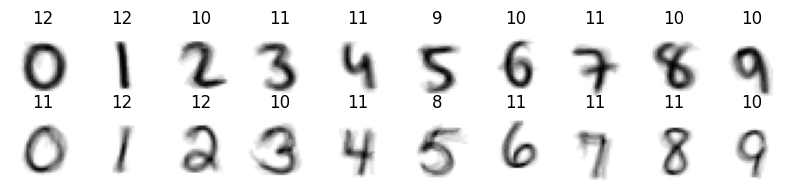

In [9]:
# check out our summed images!
figure = plt.figure(figsize=(10,2))
for w in range(2):
  for l in range(10):
    img = ims_subset[w,l,:].reshape((28,28))
    figure.add_subplot(2, 10, w*10+l+1)
    plt.axis("off")
    plt.imshow((1-img).squeeze(), cmap="gray")
    plt.title(torch.max(img).type(torch.int).tolist())
print("Number over image is the # samples summed to create image")

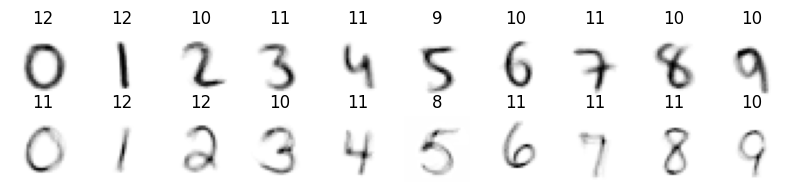

In [10]:
# check to see if images are ok
figure = plt.figure(figsize=(10,2))
for w in range(2):
  for l in range(10):
    img = ims_subset[w,l,:].reshape((28,28))
    figure.add_subplot(2, 10, w*10+l+1)
    plt.axis("off")
    imgd = (img*(1-img)).squeeze()
    plt.imshow(imgd, cmap="gray")
    plt.title(torch.max(img).type(torch.int).tolist())


In [11]:
w_rand = torch.randperm(Nwriters)
# first subset- take 6 writers in random order
subset_indicator = Iwlk[w_rand[:6],:,:]
print("Subset indicator: ", subset_indicator.shape)
print("Subset indicator: ", list(unique_everseen(subset_indicator[0,0,:].tolist())))
subset_sizes = torch.count_nonzero(subset_indicator, 2)
# use topk to find the samples.  Values =0 mean that the sample should be masked!
mask,sample_inds = torch.topk(subset_indicator,k=10,dim=2)
# whar does rhe above line do

# mask,sample_inds
print("sample_inds: ", sample_inds.shape)
print("Mask shape: ", mask.shape)

Subset indicator:  torch.Size([6, 10, 29050])
Subset indicator:  [0, 1]
sample_inds:  torch.Size([6, 10, 10])
Mask shape:  torch.Size([6, 10, 10])


In [12]:
from torch.utils.data import DataLoader, TensorDataset
# A batch as a simple Tensor tuple:
x = train_ims[sample_inds, :]

print("train ims shape", train_ims.shape)
print("sample inds shape", sample_inds.shape)
# print("X: ", X[0, 0, 0, :, :])
# y = X[:, :10, :, :, :].squeeze()
# X = X[:, 10:, :, :, :].squeeze()

# print("x[0:]", X[0][0].shape) 
print("X: ", x.shape)
# y = train_labels[sample_inds,0]
y = train_targets[sample_inds,1] # or 2
print("Y: ", y.shape)
mask, tmp = torch.topk(x,k=10,dim=2)
print("Mask: ", mask.shape)
# batch = torch.stack((X,y,mask))
batch = (x, mask, y)


train ims shape torch.Size([29050, 28, 28])
sample inds shape torch.Size([6, 10, 10])
X:  torch.Size([6, 10, 10, 28, 28])
Y:  torch.Size([6, 10, 10])
Mask:  torch.Size([6, 10, 10, 28, 28])


In [13]:
import torch
import torch.nn as nn
from torch.nn.functional import cross_entropy as ce_loss
import torch.nn.utils.parametrize as parametrize



def ein_mult(W,X):
    # 2) Compute out = dot(W,Xm) over last dim
    # For example
    #   b: batch, k: subset (e.g. token dim) c: feature_types (e.g. position, image, annotation) f: features in (e.g. embedding)
    #  X*W: '...f,...fg->...g'
    #  X*W: 'bkcf, fg -> bkcg'
    ein_dot_prod = torch.einsum('...f,...fg -> ...g', X,W)
    return ein_dot_prod

class EinLinear(nn.Module):
    def __init__(self, dims):
        super().__init__()
        self.W = nn.Parameter(torch.rand(dims),requires_grad=True)

    def forward(self, X, mask):
      return ein_mult(self.W,X)

def masksubset_mult(W,X,mask):
    # 1) Compute Xm = X(*)mask over last dim, where (*) is the "point-wise" product (aka hadamard product)
    # 2) Compute out = dot(W,Xm) over last dim
    # For example
    #   b: batch, c: feature_types (e.g. position, image, annotation) f: features in (e.g. embedding) k: subset (e.g. token dim)
    #   W: h,g,f --  h (heads) map f-dim feature space to g-dim feature space
    #  (X(*)mask)*W: '...kf,...k,...fg->...f'
    #  Wm*X: 'bkcf, fg -> bkcg'
    print(X.shape, mask.shape, W.shape) # = torch.Size([6, 10, 10, 28, 28]) torch.Size([6, 10, 10, 28, 28]) torch.Size([6, 10, 10, 28, 28])
    W = W.rename('b', 'c', 'f', 'k1', 'k2')
    # print("W: ", W)
    # masked_dot_prod = torch.einsum('...fk,...k,hgf -> ...hgk', X,mask,W) # '...fk,...k,hgf -> ...hgk'
    masked_dot_prod = torch.einsum('...fk,...k,...hgfkk -> ...hgk', X, mask, W)
    print(masked_dot_prod.shape)
    return masked_dot_prod

class MaskSubset_Linear(nn.Module):
    def __init__(self, dims):
        super().__init__()
        self.W = nn.Parameter(torch.rand(dims),requires_grad=True)

    def forward(self, X, mask):
      return masksubset_mult(self.W,X,mask)


class Masked_MLP(nn.Module):
    def __init__(self, input_dim,  output_dim, learning_rate = 1e-3):
        super().__init__()
        self.input_fc = MaskSubset_Linear(input_dim)
        self.hidden_fc = EinLinear((250, 100))
        self.output_fc = EinLinear((100, output_dim))
        self.learning_rate = learning_rate
        self.optimizer = self.configure_optimizers()
        self.loss = self.criterion
        self.train_log_error = list()
        self.test_log_error = list()

    def forward(self, x, mask):
        h_1 = F.relu(self.input_fc(x,mask))
        h_2 = F.relu(self.hidden_fc(h_1))
        y_pred = self.output_fc(h_2)
        return y_pred, h_2

    def criterion(yhat,y):
        # need to implement masked loss
        l = ce_loss(yhat,y)
        return torch.mean(l)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(),lr=self.learning_rate,)
        return optimizer
    


    def training_step(self, batch):
        x,mask,y = batch

        self.train(True)
        self.optimizer.zero_grad()
        y_pred,_ = self.forward(x,mask)
        error = self.criterion(y_pred,y)
        error.backward()
        self.optimizer.step()

        self.train_log_error.append(error.detach())
        return error

    def predict(self, batch):
        x,mask,y = batch

        self.train(False)
        self.optimizer.zero_grad()
        y_pred,_ = self.forward(x,mask)
        error = self.criterion(y_pred,y)

        self.test_log_error.append(error.detach())
        return error

In [ ]:
INPUT_DIM = x.shape # (6, 10, 10, 28, 28) # (X.shape, y.shape, mask.shape)
# INPUT_DIM = [X,y,mask]
OUTPUT_DIM = 10

model = []
model = Masked_MLP(INPUT_DIM, OUTPUT_DIM)
# model = model.to(device)

def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

EPOCHS = 10

dataset = TensorDataset(x, mask, y)

# Create a data loader
batch_size = 60  # Set your desired batch size
batch_iterator = DataLoader(dataset, batch_size=batch_size, shuffle=True)
# print(batch_iterator.shape)

best_valid_loss = float('inf')

for epoch in range(EPOCHS):
    for batchidx, batch in enumerate(batch_iterator): # batch_iterator
      train_loss = model.training_step(batch)
      valid_loss = model.predict(batch)

      if valid_loss < best_valid_loss:
          best_valid_loss = valid_loss
          torch.save(model.state_dict(), 'batch-model.pt')

    print(torch.cumsum(model.train_log_error)/(torch.arange(len(model.train_log_error))+1))